<a href="https://colab.research.google.com/github/TayyabKhan54/Machine-learning-project-/blob/main/CLASS_ASSIGNMENT_SOLUTION_CNN_vs_MLP_on_CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CLASS ASSIGNMENT SOLUTION
CNN vs MLP on CIFAR-10

Part 1 – Dataset Exploration

In [ ]:
# Import required libraries
import numpy as np                           # Numerical operations
import matplotlib.pyplot as plt              # Plotting graphs
import tensorflow as tf                      # Deep Learning framework
from tensorflow.keras import layers, models  # Neural network layers
from tensorflow.keras.utils import to_categorical
import time                                  # To measure training time
import seaborn as sns                        # For confusion matrix
from sklearn.metrics import confusion_matrix


Load CIFAR-10 Dataset

In [ ]:
# Load CIFAR-10 dataset from Keras
# It automatically downloads dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


Dataset Shape

In [ ]:
# Print dataset shapes
print("Training Data Shape:", X_train.shape)   # (50000, 32, 32, 3)
print("Test Data Shape:", X_test.shape)        # (10000, 32, 32, 3)

# Print number of classes
print("Number of classes:", len(np.unique(y_train)))


Training Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)
Number of classes: 10


Class Names

In [ ]:
# CIFAR-10 class labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']


Display 10 Sample Images

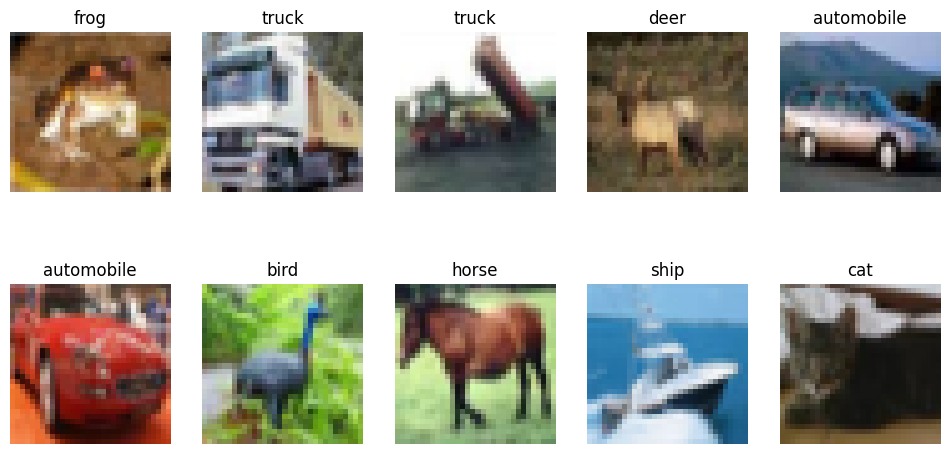

In [ ]:
# Create figure
plt.figure(figsize=(12,6))

# Loop through 10 classes
for i in range(10):
    plt.subplot(2,5,i+1)                     # 2 rows, 5 columns
    plt.imshow(X_train[i])                   # Show image
    plt.title(class_names[y_train[i][0]])    # Show class label
    plt.axis('off')                          # Hide axis

plt.show()


Pixel Distribution

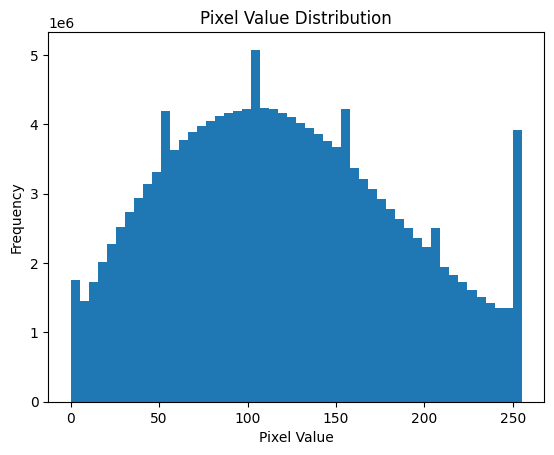

In [ ]:
# Flatten pixels and plot histogram
plt.hist(X_train.flatten(), bins=50)
plt.title("Pixel Value Distribution")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


**Part 2 – Data Preprocessing**

Memory Before Normalization

In [ ]:
print("Memory before normalization (MB):", X_train.nbytes / 1e6)


Memory before normalization (MB): 153.6


Normalize Pixel Values (0–1)

In [ ]:
# Convert pixel values from 0-255 → 0-1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255


One-Hot Encoding Labels

In [ ]:
# Convert labels to categorical (one-hot encoding)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


Validation Split

In [ ]:
# Split validation set from training data
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42)


**Part 3 – Model 1: MLP**

Flatten Input

In [ ]:
# Flatten 32x32x3 = 3072 features
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_val_flat = X_val.reshape(X_val.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)


Build MLP Model

In [ ]:
# Create Sequential model
mlp_model = models.Sequential()

# First Dense layer (Hidden Layer 1)
mlp_model.add(layers.Dense(512, activation='relu', input_shape=(3072,)))

# Second Dense layer
mlp_model.add(layers.Dense(256, activation='relu'))

# Third Dense layer
mlp_model.add(layers.Dense(128, activation='relu'))

# Output layer (10 classes, softmax)
mlp_model.add(layers.Dense(10, activation='softmax'))

# Compile model
mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train MLP

In [ ]:
start_time = time.time()

history_mlp = mlp_model.fit(
    X_train_flat, y_train,
    epochs=20,
    validation_data=(X_val_flat, y_val),
    batch_size=64
)

mlp_training_time = time.time() - start_time


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.2712 - loss: 2.0019 - val_accuracy: 0.3594 - val_loss: 1.7545
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3863 - loss: 1.7067 - val_accuracy: 0.4172 - val_loss: 1.6220
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4303 - loss: 1.5957 - val_accuracy: 0.4144 - val_loss: 1.6134
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4490 - loss: 1.5517 - val_accuracy: 0.4430 - val_loss: 1.5475
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4659 - loss: 1.4880 - val_accuracy: 0.4532 - val_loss: 1.5320
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4725 - loss: 1.4754 - val_accuracy: 0.4542 - val_loss: 1.5228
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4914 - loss: 1.4252 - val_accuracy: 0.4402 - val_loss: 1.5456
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4985 - loss: 1.3984 - val_accuracy: 0.

Evaluate MLP

In [ ]:
mlp_test_loss, mlp_test_acc = mlp_model.evaluate(X_test_flat, y_test)
print("MLP Test Accuracy:", mlp_test_acc)
print("MLP Training Time:", mlp_training_time)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4885 - loss: 1.4898
MLP Test Accuracy: 0.491100013256073
MLP Training Time: 51.835750341415405


Plot Training Curves

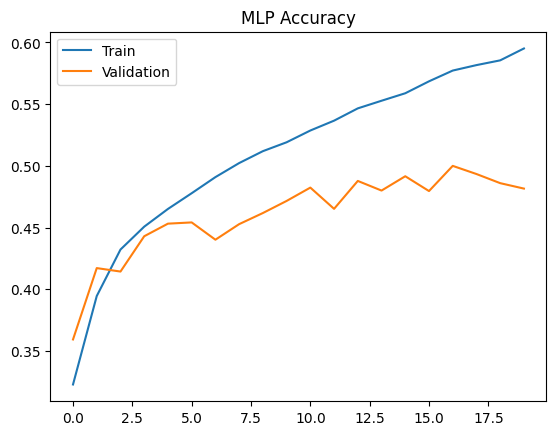

In [ ]:
plt.plot(history_mlp.history['accuracy'])
plt.plot(history_mlp.history['val_accuracy'])
plt.title("MLP Accuracy")
plt.legend(['Train','Validation'])
plt.show()


**Part 4 – Model 2: CNN**

In [ ]:
cnn_model = models.Sequential()

# Convolution Block 1
cnn_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D((2,2)))

# Convolution Block 2
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2,2)))

# Convolution Block 3
cnn_model.add(layers.Conv2D(128, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2,2)))

# Flatten layer
cnn_model.add(layers.Flatten())

# Dense layer
cnn_model.add(layers.Dense(128, activation='relu'))

# Dropout for regularization
cnn_model.add(layers.Dropout(0.5))

# Output layer
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train CNN

In [ ]:
start_time = time.time()

history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    batch_size=64
)

cnn_training_time = time.time() - start_time


Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.2810 - loss: 1.9332 - val_accuracy: 0.5034 - val_loss: 1.3792
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5116 - loss: 1.3778 - val_accuracy: 0.5970 - val_loss: 1.1289
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5790 - loss: 1.1912 - val_accuracy: 0.6328 - val_loss: 1.0151
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6231 - loss: 1.0679 - val_accuracy: 0.6516 - val_loss: 0.9940
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6622 - loss: 0.9672 - val_accuracy: 0.6654 - val_loss: 0.9356
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6804 - loss: 0.9120 - val_accuracy: 0.6864 - val_loss: 0.8825
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7029 - loss: 0.8519 - val_accuracy: 0.7016 - val_loss: 0.8488
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7216 - loss: 0.7967 - val_accuracy: 0

Evaluate CNN

In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test)

print("CNN Test Accuracy:", cnn_test_acc)
print("CNN Training Time:", cnn_training_time)


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7369 - loss: 0.8598
CNN Test Accuracy: 0.7333999872207642
CNN Training Time: 72.48228168487549


In [ ]:
from tensorflow.keras import layers, models

cnn_model = models.Sequential()

# Convolution Block 1
cnn_model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)))
cnn_model.add(layers.MaxPooling2D((2,2)))

# Convolution Block 2
cnn_model.add(layers.Conv2D(64, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2,2)))

# Convolution Block 3
cnn_model.add(layers.Conv2D(128, (3,3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2,2)))

# Flatten layer
cnn_model.add(layers.Flatten())

# Dense layer
cnn_model.add(layers.Dense(128, activation='relu'))

# Dropout for regularization
cnn_model.add(layers.Dropout(0.5))

# Output layer
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compile
cnn_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test)

print("CNN Test Accuracy:", cnn_test_acc)
print("CNN Training Time:", cnn_training_time)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.0976 - loss: 2.3109
CNN Test Accuracy: 0.10040000081062317
CNN Training Time: 72.48228168487549


In [ ]:
import time

start_time = time.time()

history_cnn = cnn_model.fit(
    X_train, y_train,
    epochs=20,
    validation_data=(X_val, y_val),
    batch_size=64
)

cnn_training_time = time.time() - start_time

Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.2761 - loss: 1.9325 - val_accuracy: 0.4950 - val_loss: 1.3834
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5001 - loss: 1.3852 - val_accuracy: 0.5736 - val_loss: 1.1970
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.5662 - loss: 1.2274 - val_accuracy: 0.6112 - val_loss: 1.0820
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6134 - loss: 1.1071 - val_accuracy: 0.6332 - val_loss: 1.0470
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6433 - loss: 1.0158 - val_accuracy: 0.6666 - val_loss: 0.9409
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6691 - loss: 0.9486 - val_accuracy: 0.6836 - val_loss: 0.9144
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6921 - loss: 0.8844 - val_accuracy: 0.6844 - val_loss: 0.9051
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7119 - loss: 0.8364 - val_accuracy: 0.

In [ ]:
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(X_test, y_test)

print("CNN Test Accuracy:", cnn_test_acc)
print("CNN Training Time:", cnn_training_time)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7198 - loss: 0.9331
CNN Test Accuracy: 0.7179999947547913
CNN Training Time: 65.4458839893341


Part 5 – Data Augmentation

In [ ]:
# Image Data Generator for augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    zoom_range=0.2
)

# Fit generator
datagen.fit(X_train)

# Train CNN with augmented data
history_aug = cnn_model.fit(
    datagen.flow(X_train, y_train, batch_size=64),
    epochs=20,
    validation_data=(X_val, y_val)
)


Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


704/704 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.5366 - loss: 1.3685 - val_accuracy: 0.6866 - val_loss: 0.8969
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.5742 - loss: 1.2375 - val_accuracy: 0.6932 - val_loss: 0.8847
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.5903 - loss: 1.1849 - val_accuracy: 0.7000 - val_loss: 0.8429
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6008 - loss: 1.1689 - val_accuracy: 0.6746 - val_loss: 0.9673
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 25s 36ms/step - accuracy: 0.6019 - loss: 1.1513 - val_accuracy: 0.7048 - val_loss: 0.8546
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6147 - loss: 1.1155 - val_accuracy: 0.7020 - val_loss: 0.8594
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 37ms/step - accuracy: 0.6136 - loss: 1.1145 - val_accuracy: 0.6612 - val_loss: 0.9898
Epoch 8/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 26s 36ms/step - accuracy: 0.6279 - loss: 1.0906 - val_accurac

**Part 6 – Model Comparison**

Confusion Matrix (CNN Example)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


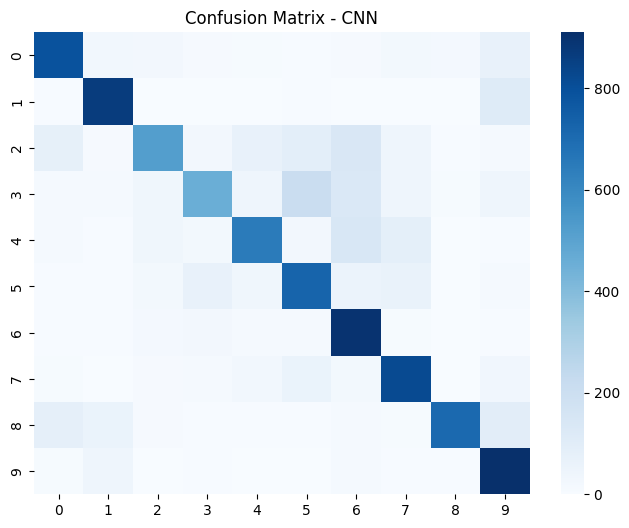

In [ ]:
# Predict labels
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("Confusion Matrix - CNN")
plt.show()


Performance Comparison Table

In [ ]:
print("Model Comparison")
print("--------------------------------------------------")
print("MLP Accuracy:", mlp_test_acc)
print("CNN Accuracy:", cnn_test_acc)
print("MLP Training Time:", mlp_training_time)
print("CNN Training Time:", cnn_training_time)


Model Comparison
--------------------------------------------------
MLP Accuracy: 0.491100013256073
CNN Accuracy: 0.7179999947547913
MLP Training Time: 51.835750341415405
CNN Training Time: 65.4458839893341
